# 배운 것

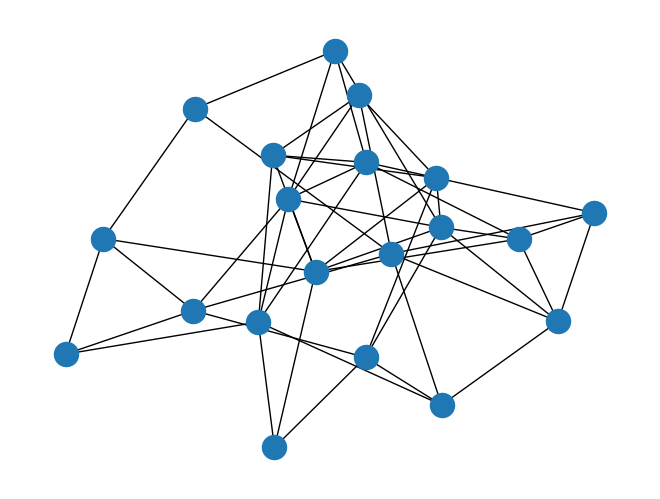

In [1]:
import networkx as nx

G = nx.gnm_random_graph(20, 50)
nx.draw(G)

In [2]:
import random
import string

def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = random.choice('ABCD')
    return state

In [3]:
initial_state(G)

{0: 'B',
 1: 'C',
 2: 'D',
 3: 'B',
 4: 'A',
 5: 'B',
 6: 'A',
 7: 'A',
 8: 'C',
 9: 'A',
 10: 'D',
 11: 'D',
 12: 'D',
 13: 'C',
 14: 'C',
 15: 'C',
 16: 'C',
 17: 'D',
 18: 'B',
 19: 'B'}

In [4]:
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            next_state[node] = current_state[neighbor]
    return next_state

In [5]:
test_state = initial_state(G)
state_transition(G, test_state)

{0: 'B',
 1: 'C',
 2: 'B',
 3: 'C',
 4: 'A',
 5: 'D',
 6: 'C',
 7: 'C',
 8: 'C',
 9: 'D',
 10: 'C',
 11: 'C',
 12: 'D',
 13: 'A',
 14: 'C',
 15: 'C',
 16: 'C',
 17: 'A',
 18: 'C',
 19: 'D'}

In [7]:
import matplotlib.pyplot as plt
from simulation import Simulation

sim = Simulation(G, initial_state, state_transition, name='Voter Model')

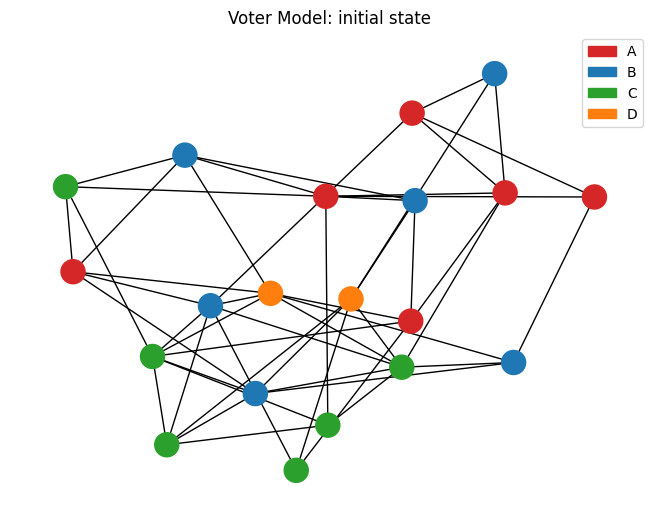

In [8]:
sim.draw(labels='ABCD')

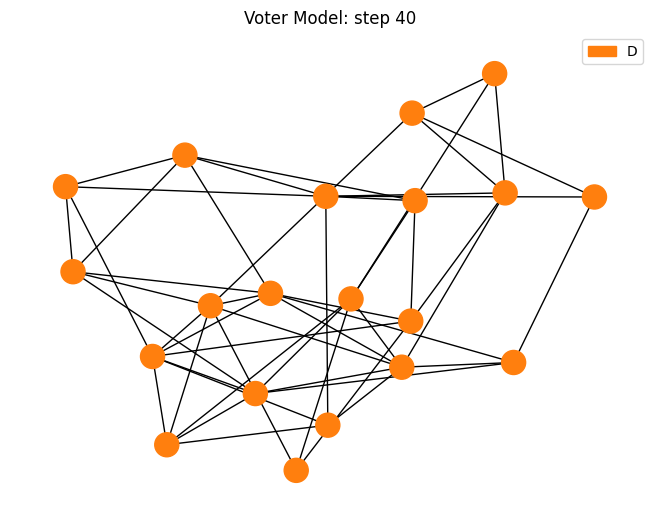

In [9]:
sim.run(40)
sim.draw()

<Axes: title={'center': 'Voter Model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

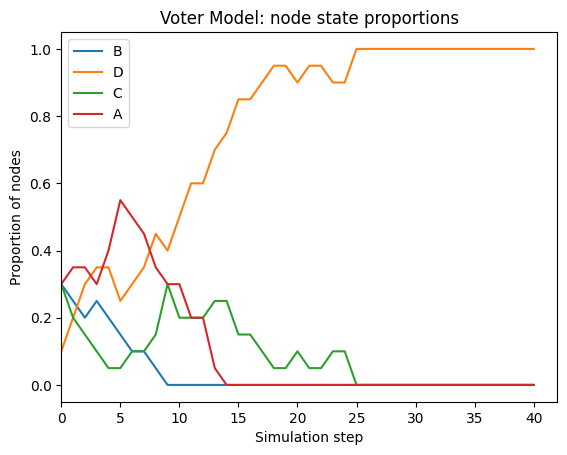

In [10]:
sim.plot()

# 새로운 시도

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from networkx.algorithms import community

# ISO-8859-1 인코딩으로 파일 읽기
file_path = '한국직업정보(KNOW)_재직자조사_성격·지식_원자료.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)

# 데이터프레임의 모든 문자열 열을 utf-8로 다시 인코딩
def decode_column(column):
    def safe_decode(x):
        if isinstance(x, str):
            try:
                return x.encode('ISO-8859-1').decode('euc-kr')
            except UnicodeDecodeError:
                return x
        return x
    return column.apply(safe_decode)

for column in data.select_dtypes(include=['object']):
    data[column] = decode_column(data[column])

# 열 이름과 데이터프레임의 첫 몇 줄 확인
data.head()

,id,knowcode,knowcode2019,keco07_4digit,keco18_4digit,job,sq1,sq2,sq3,sq4,...,bq27,bq27_1,bq28,bq28_1,bq28_2,bq29,bq30,bq31_1,bq31_2,bq31_3
0,1901110201,11102.0,11102.0,111.0,111.0,행정부고위공무원,5.0,5.0,5.0,3.0,...,5.0,행정학,1.0,3,,1,40.0,9000,9000,
1,1901110202,11102.0,11102.0,111.0,111.0,행정부고위공무원,5.0,5.0,5.0,5.0,...,4.0,행정학,1.0,3,,1,40.0,7000,7000,
2,1901110203,11102.0,11102.0,111.0,111.0,행정부고위공무원,5.0,4.0,5.0,5.0,...,4.0,철학과,1.0,3,,1,44.0,11000,8000,
3,1901110204,11102.0,11102.0,111.0,111.0,행정부고위공무원,5.0,4.0,4.0,5.0,...,5.0,사회복지학,1.0,1,,1,40.0,9000,7000,
4,1901110205,11102.0,11102.0,111.0,111.0,행정부고위공무원,5.0,5.0,4.0,3.0,...,4.0,재약학,1.0,1,,1,45.0,9300,7500,


In [4]:
# 설문 조사 질문 및 직업 지식 관련 열만 추출
features = data.iloc[:, 6:156]
features.head()

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,sq8,sq9,sq10,...,bq26,bq27,bq27_1,bq28,bq28_1,bq28_2,bq29,bq30,bq31_1,bq31_2
0,5.0,5.0,5.0,3.0,4.0,4.0,5.0,4.0,5.0,4.0,...,64.0,5.0,행정학,1.0,3,,1,40.0,9000,9000
1,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,...,58.0,4.0,행정학,1.0,3,,1,40.0,7000,7000
2,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,54.0,4.0,철학과,1.0,3,,1,44.0,11000,8000
3,5.0,4.0,4.0,5.0,3.0,3.0,3.0,3.0,3.0,4.0,...,60.0,5.0,사회복지학,1.0,1,,1,40.0,9000,7000
4,5.0,5.0,4.0,3.0,4.0,3.0,5.0,4.0,4.0,5.0,...,53.0,4.0,재약학,1.0,1,,1,45.0,9300,7500


In [3]:
''' 아래 출력 하지 말기 '''
# # 모든 컬럼을 출력하도록 설정 변경
# pd.set_option('display.max_rows', None)
# missing_values=features.isnull().sum()
# print(missing_values)

sq1        0
sq2        0
sq3        0
sq4        0
sq5        0
sq6        0
sq7        0
sq8        0
sq9        0
sq10       0
sq11       0
sq12       0
sq13       0
sq14       0
sq15       0
sq16       0
kq1_1      0
kq1_2      0
kq2_1      0
kq2_2      0
kq3_1      0
kq3_2      0
kq4_1      0
kq4_2      0
kq5_1      0
kq5_2      0
kq6_1      0
kq6_2      0
kq7_1      0
kq7_2      0
kq8_1      0
kq8_2      0
kq9_1      0
kq9_2      0
kq10_1     0
kq10_2     0
kq11_1     0
kq11_2     0
kq12_1     0
kq12_2     0
kq13_1     0
kq13_2     0
kq14_1     0
kq14_2     0
kq15_1     0
kq15_2     0
kq16_1     0
kq16_2     0
kq17_1     0
kq17_2     0
kq18_1     0
kq18_2     0
kq19_1     0
kq19_2     0
kq20_1     0
kq20_2     0
kq21_1     0
kq21_2     0
kq22_1     0
kq22_2     0
kq23_1     0
kq23_2     0
kq24_1     0
kq24_2     0
kq25_1     0
kq25_2     0
kq26_1     0
kq26_2     0
kq27_1     0
kq27_2     0
kq28_1     0
kq28_2     0
kq29_1     0
kq29_2     0
kq30_1     0
kq30_2     0
kq31_1     0

In [5]:
# 모든 값을 숫자형으로 변환하고, 변환할 수 없는 값은 0으로 대체
features = features.apply(pd.to_numeric, errors='coerce').fillna(0)

# 코사인 유사도 계산
similarity_matrix = cosine_similarity(features)

In [6]:
features.head()

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,sq8,sq9,sq10,...,bq26,bq27,bq27_1,bq28,bq28_1,bq28_2,bq29,bq30,bq31_1,bq31_2
0,5.0,5.0,5.0,3.0,4.0,4.0,5.0,4.0,5.0,4.0,...,64.0,5.0,0.0,1.0,3.0,0.0,1.0,40.0,9000.0,9000.0
1,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,...,58.0,4.0,0.0,1.0,3.0,0.0,1.0,40.0,7000.0,7000.0
2,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,54.0,4.0,0.0,1.0,3.0,0.0,1.0,44.0,11000.0,8000.0
3,5.0,4.0,4.0,5.0,3.0,3.0,3.0,3.0,3.0,4.0,...,60.0,5.0,0.0,1.0,1.0,0.0,1.0,40.0,9000.0,7000.0
4,5.0,5.0,4.0,3.0,4.0,3.0,5.0,4.0,4.0,5.0,...,53.0,4.0,0.0,1.0,1.0,0.0,1.0,45.0,9300.0,7500.0


In [7]:
similarity_matrix

array([[1.        , 0.99999775, 0.98776151, ..., 0.99977719, 0.96243318,
        0.        ],
       [0.99999775, 1.        , 0.98775992, ..., 0.99978926, 0.96243921,
        0.        ],
       [0.98776151, 0.98775992, 1.        , ..., 0.99037784, 0.99299046,
        0.        ],
       ...,
       [0.99977719, 0.99978926, 0.99037784, ..., 1.        , 0.96721084,
        0.        ],
       [0.96243318, 0.96243921, 0.99299046, ..., 0.96721084, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [8]:
similarity_matrix.shape

(4718, 4718)

In [ ]:
''' 아래 출력 하지 말기 '''
# import numpy as np
# # 생략된 부분 없이 전체 출력이라서 엄청 오래 걸림
# np.set_printoptions(threshold=np.inf)

# # 배열 출력
# print(similarity_matrix)

# # 이후 원래대로 옵션을 돌리기
# np.set_printoptions(threshold=1000)  # 기본값 1000으로 재설정

In [9]:
# 유사도 기반으로 네트워크 구성
G = nx.Graph()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

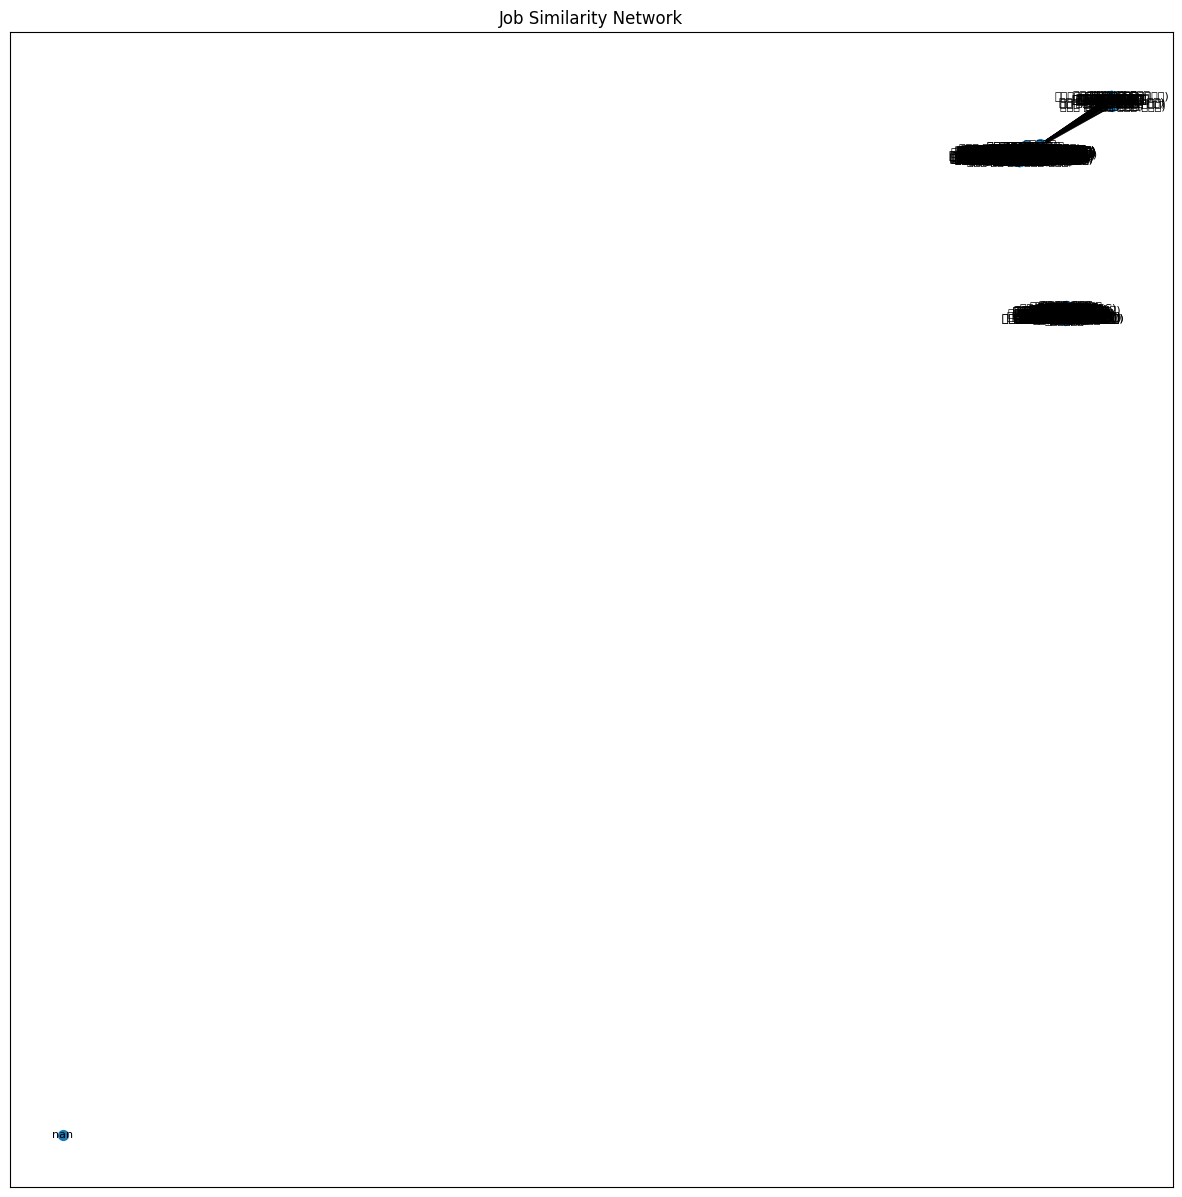

In [10]:
# 노드 추가
for i, job in enumerate(data['job']):
    G.add_node(i, label=job)

# 엣지 추가 (유사도가 높은 경우에만 엣지 추가)
for i in range(len(similarity_matrix)):
    for j in range(i+1, len(similarity_matrix)):
        if similarity_matrix[i][j] > 0.8:  # 유사도가 0.8 이상인 경우에만 엣지 추가
            G.add_edge(i, j, weight=similarity_matrix[i][j])

# 네트워크 시각화
pos = nx.spring_layout(G, seed=42)  # 레이아웃 설정
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G, pos, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, {i: job for i, job in enumerate(data['job'])}, font_size=8)
plt.title('Job Similarity Network')
plt.show()

# 실패

In [ ]:
# import pandas as pd
# import networkx as nx
# import matplotlib.pyplot as plt
# from networkx.algorithms import community

# # 데이터 로드
# file_path = '/mnt/data/한국직업정보(KNOW)_재직자조사_성격·지식_원자료.csv'
# data = pd.read_csv(file_path, encoding='latin1')

# # 필요한 컬럼 선택 (예: 직업명과 관련된 지식)
# columns_of_interest = ['job', 'kq1_1', 'kq1_2', 'kq2_1', 'kq2_2']  # 예시 컬럼
# data_subset = data[columns_of_interest]

# # 직업 간의 관계 정의 (예: 지식이 유사한 직업들 간에 링크 생성)
# # 간단한 유사도 계산을 위해 코사인 유사도를 사용할 수 있음
# from sklearn.metrics.pairwise import cosine_similarity

# # 직업명을 인덱스로 설정
# data_subset.set_index('job', inplace=True)
# # 결측값 처리 (0으로 대체)
# data_subset.fillna(0, inplace=True)

# # 유사도 행렬 계산
# similarity_matrix = cosine_similarity(data_subset)
# similarity_df = pd.DataFrame(similarity_matrix, index=data_subset.index, columns=data_subset.index)

# # 네트워크 생성
# G = nx.Graph()

# # 노드 추가
# for job in data_subset.index:
#     G.add_node(job)

# # 링크 추가 (유사도가 특정 임계값 이상인 경우에만 링크 생성)
# threshold = 0.7  # 임계값은 조정 가능
# for i, job1 in enumerate(data_subset.index):
#     for j, job2 in enumerate(data_subset.index):
#         if i < j and similarity_df.loc[job1, job2] > threshold:
#             G.add_edge(job1, job2, weight=similarity_df.loc[job1, job2])

# # 군집 분석 (Girvan-Newman 알고리즘 사용)
# communities = community.girvan_newman(G)
# top_level_communities = next(communities)
# sorted_communities = sorted(map(sorted, top_level_communities))

# # 네트워크 시각화
# pos = nx.spring_layout(G)  # 레이아웃 설정
# plt.figure(figsize=(12, 12))

# # 노드 그리기 (군집별로 색상 다르게)
# colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
# for i, community in enumerate(sorted_communities):
#     nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=colors[i % len(colors)], label=f'Community {i+1}')

# # 엣지 그리기
# nx.draw_networkx_edges(G, pos, alpha=0.5)

# # 라벨 그리기
# nx.draw_networkx_labels(G, pos, font_size=10)

# plt.title('직업 네트워크 시각화 및 군집 분석')
# plt.legend()
# plt.show()

In [1]:
# import pandas as pd
# import networkx as nx
# import matplotlib.pyplot as plt
# from sklearn.metrics.pairwise import cosine_similarity
# from networkx.algorithms import community

# # 데이터 로드
# data = pd.read_csv('한국직업정보(KNOW)_재직자조사_성격·지식_원자료.csv', encoding='ISO-8859-1')
# data.head()

<ipython-input-1-664dc13786c3>:8: DtypeWarning: Columns (153) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('한국직업정보(KNOW)_재직자조사_성격·지식_원자료.csv', encoding='ISO-8859-1')


,id,knowcode,knowcode2019,keco07_4digit,keco18_4digit,job,sq1,sq2,sq3,sq4,...,bq27,bq27_1,bq28,bq28_1,bq28_2,bq29,bq30,bq31_1,bq31_2,bq31_3
0,1901110201,11102,11102,111,111,ÇàÁ¤ºÎ°íÀ§°ø¹«¿ø,5,5,5,3,...,5,ÇàÁ¤ÇÐ,1,3,,1,40,9000,9000,
1,1901110202,11102,11102,111,111,ÇàÁ¤ºÎ°íÀ§°ø¹«¿ø,5,5,5,5,...,4,ÇàÁ¤ÇÐ,1,3,,1,40,7000,7000,
2,1901110203,11102,11102,111,111,ÇàÁ¤ºÎ°íÀ§°ø¹«¿ø,5,4,5,5,...,4,Ã¶ÇÐ°ú,1,3,,1,44,11000,8000,
3,1901110204,11102,11102,111,111,ÇàÁ¤ºÎ°íÀ§°ø¹«¿ø,5,4,4,5,...,5,»çÈ¸º¹ÁöÇÐ,1,1,,1,40,9000,7000,
4,1901110205,11102,11102,111,111,ÇàÁ¤ºÎ°íÀ§°ø¹«¿ø,5,5,4,3,...,4,Àç¾àÇÐ,1,1,,1,45,9300,7500,


In [3]:
# import pandas as pd

# # ISO-8859-1 인코딩으로 파일 읽기
# data = pd.read_csv('한국직업정보(KNOW)_재직자조사_성격·지식_원자료.csv', encoding='ISO-8859-1', low_memory=False)

# # 데이터프레임의 모든 문자열 열을 utf-8로 다시 인코딩
# def decode_column(column):
#     def safe_decode(x):
#         if isinstance(x, str):
#             try:
#                 return x.encode('ISO-8859-1').decode('euc-kr')
#             except UnicodeDecodeError:
#                 return x
#         return x
#     return column.apply(safe_decode)

# for column in data.select_dtypes(include=['object']):
#     data[column] = decode_column(data[column])
# # import ace_tools as tools; tools.display_dataframe_to_user(name="Decoded Data", dataframe=data)
# data.head()


,id,knowcode,knowcode2019,keco07_4digit,keco18_4digit,job,sq1,sq2,sq3,sq4,...,bq27,bq27_1,bq28,bq28_1,bq28_2,bq29,bq30,bq31_1,bq31_2,bq31_3
0,1901110201,11102,11102,111,111,행정부고위공무원,5,5,5,3,...,5,행정학,1,3,,1,40,9000,9000,
1,1901110202,11102,11102,111,111,행정부고위공무원,5,5,5,5,...,4,행정학,1,3,,1,40,7000,7000,
2,1901110203,11102,11102,111,111,행정부고위공무원,5,4,5,5,...,4,철학과,1,3,,1,44,11000,8000,
3,1901110204,11102,11102,111,111,행정부고위공무원,5,4,4,5,...,5,사회복지학,1,1,,1,40,9000,7000,
4,1901110205,11102,11102,111,111,행정부고위공무원,5,5,4,3,...,4,재약학,1,1,,1,45,9300,7500,


In [2]:
# # 필요한 컬럼 선택 (예: 직업명과 관련된 지식)
# columns_of_interest = ['job'] + [f'kq{i}_1' for i in range(1, 34)]  # kq1_1 ~ kq33_1 컬럼
# print(columns_of_interest)
# # columns_of_interest
# data_subset = data[columns_of_interest]
# data_subset

['job', 'kq1_1', 'kq2_1', 'kq3_1', 'kq4_1', 'kq5_1', 'kq6_1', 'kq7_1', 'kq8_1', 'kq9_1', 'kq10_1', 'kq11_1', 'kq12_1', 'kq13_1', 'kq14_1', 'kq15_1', 'kq16_1', 'kq17_1', 'kq18_1', 'kq19_1', 'kq20_1', 'kq21_1', 'kq22_1', 'kq23_1', 'kq24_1', 'kq25_1', 'kq26_1', 'kq27_1', 'kq28_1', 'kq29_1', 'kq30_1', 'kq31_1', 'kq32_1', 'kq33_1']


,job,kq1_1,kq2_1,kq3_1,kq4_1,kq5_1,kq6_1,kq7_1,kq8_1,kq9_1,...,kq24_1,kq25_1,kq26_1,kq27_1,kq28_1,kq29_1,kq30_1,kq31_1,kq32_1,kq33_1
0,행정부고위공무원,1,2,1,1,4,1,1,1,3,...,3,3,1,1,1,1,3,1,5,1
1,행정부고위공무원,4,4,2,3,4,4,1,1,3,...,4,2,1,1,1,1,1,4,1,1
2,행정부고위공무원,5,3,5,4,5,5,4,1,3,...,3,3,1,3,5,5,5,1,4,1
3,행정부고위공무원,4,4,4,1,5,4,1,1,4,...,2,3,1,1,4,2,2,1,3,1
4,행정부고위공무원,5,3,3,1,5,4,1,1,4,...,1,2,1,2,3,3,4,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17138,어부 및 해녀,1,1,1,1,1,1,1,3,1,...,1,1,1,1,1,1,1,1,1,1
17139,어부 및 해녀,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
17140,어부 및 해녀,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
17141,어부 및 해녀,1,1,1,3,4,1,1,1,1,...,1,1,1,1,1,1,1,4,1,3


In [ ]:
# import pandas as pd
# import networkx as nx
# import matplotlib.pyplot as plt
# from sklearn.metrics.pairwise import cosine_similarity
# from networkx.algorithms import community

# # 데이터 로드
# file_path = '/mnt/data/한국직업정보(KNOW)_재직자조사_성격·지식_원자료.csv'
# data = pd.read_csv(file_path, encoding='latin1')

# # 필요한 컬럼 선택 (예: 직업명과 관련된 지식)
# columns_of_interest = ['job'] + [f'kq{i}_1' for i in range(1, 34)]  # kq1_1 ~ kq33_1 컬럼
# data_subset = data[columns_of_interest]

# 직업명을 인덱스로 설정
data_subset.set_index('job', inplace=True)
# 결측값 처리 (0으로 대체)
data_subset.fillna(0, inplace=True)

# 유사도 행렬 계산
similarity_matrix = cosine_similarity(data_subset)
similarity_df = pd.DataFrame(similarity_matrix, index=data_subset.index, columns=data_subset.index)

# 네트워크 생성
G = nx.Graph()

# 노드 추가
for job in data_subset.index:
    G.add_node(job)

# 링크 추가 (유사도가 특정 임계값 이상인 경우에만 링크 생성)
threshold = 0.7  # 임계값은 조정 가능
for i, job1 in enumerate(data_subset.index):
    for j, job2 in enumerate(data_subset.index):
        if i < j and similarity_df.loc[job1, job2] > threshold:
            G.add_edge(job1, job2, weight=similarity_df.loc[job1, job2])

# 군집 분석 (Girvan-Newman 알고리즘 사용)
communities = community.girvan_newman(G)
top_level_communities = next(communities)
sorted_communities = sorted(map(sorted, top_level_communities))

# 네트워크 시각화
pos = nx.spring_layout(G)  # 레이아웃 설정
plt.figure(figsize=(12, 12))

# 노드 그리기 (군집별로 색상 다르게)
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for i, community in enumerate(sorted_communities):
    nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=colors[i % len(colors)], label=f'Community {i+1}')

# 엣지 그리기
nx.draw_networkx_edges(G, pos, alpha=0.5)

# 라벨 그리기
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title('직업 네트워크 시각화 및 군집 분석')
plt.legend()
plt.show()

<ipython-input-13-dfdddac15603>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset.fillna(0, inplace=True)


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().